In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Inital Parameters

In [2]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 4000, t_step)
keep = int(t_last / t_step)
k = 0.1
gamma = 0.2
mu = 2
beta = 0.2
alpha_up = np.arange(0,20, 0.1)
alpha_down = alpha_up[::-1]

In [ ]:
def compute_amplitude(sol, keep):
    y = sol[-keep:, 1]  # y -> Duffing
    peaks, properties = find_peaks(y, height= (y[np.argmax(y)]-0.1, y[np.argmax(y)] + 0.1))
    heights = properties["peak_heights"]
    # plt.plot(t[-keep:], y)
    # plt.show()
    if len(heights) == 0:
        return 0
    amp = np.mean(heights[-10:]) if len(heights) >= 10 else np.mean(heights)
    print(amp, y[np.argmax(y)])
    return amp

In [3]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).find_peaks_max()[1][1]['peak_heights'][-6:])
    return amp

In [ ]:
par0 = 1, 0.5, 0.5, 1
amplitudes_up = []
amplitudes_down = []



state = par0
for alpha in alpha_up:
    sol = OnesidedCoupling(state, t, keep, k, gamma, mu, beta,alpha).duffvdpsolver()
    state = sol[-1]  
    amp = compute_amplitude(sol, keep)
    amplitudes_up.append(amp)


state = sol[-1]
for alpha in alpha_down:
    sol = OnesidedCoupling(state, t, keep, k, gamma, mu, beta,alpha).duffvdpsolver()
    state = sol[-1]  
    amp = compute_amplitude(sol, keep)
    amplitudes_down.append(amp)

In [ ]:
plt.plot(alpha_up, amplitudes_up, label="Frequenz ↑", color="blue")
plt.plot(alpha_down, amplitudes_down, label="Frequenz ↓", color="red")

plt.xlabel("alpha")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [ ]:
x0 = 1
for i in range(6):
    print(x0)
    x0 = i

# Resonance

In [ ]:
amplitudes_up = []
state = 1,1,1,1
for alpha in alpha_up:
    sol = OnesidedCoupling(state, t, keep, k, gamma, mu, beta,alpha).duffvdpsolver()
    print(alpha, state)
    amp = compute_amplitude(sol, keep)
    amplitudes_up.append(amp)

plt.plot(np.sqrt(alpha_up), amplitudes_up)

plt.xlabel("alpha")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [18]:
par0 = 1, 0.5, 0.5, 1
amplitudes_up = []
amplitudes_down = []

for f in alpha_up:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, f, beta).duffvdpsolver()
    par0 = sol[-1]
    print(par0)
    amplitudes_up.append(compute_amplitude(par0, t, keep, k, mu, gamma, f, beta))


par0 = sol[-1]
for j in alpha_down:
    sol = OnesidedCoupling(par0, t, keep, k, mu, gamma, j, beta).duffvdpsolver()
    par0 = sol[-1]  
    print(par0)
    amplitudes_down.append(compute_amplitude(par0, t, keep, k, mu, gamma, j, beta))

[-0.83424703 -5.20785553 -3.79697456 -7.95828013]
[-1.59446897 -5.99844695  0.45185635  2.82743509]
[ 1.03821949 -2.12699197  3.79580596  9.25418206]
[ 1.57000812  0.16231078 -0.46293077  8.84671434]
[-1.23694922 -5.7908768  -3.61682155 -5.65844886]
[-1.54465672 -5.55737979  0.47487466  3.06501025]
[ 1.42418589 -0.95249258  3.25491527 11.46718012]
[ 1.51867118  1.40609158 -0.48763722 11.98584777]
[-1.58789029 -6.04095427 -2.75706441 -3.31194257]
[-1.49192546 -5.1857895   0.50135188  2.83446554]
[ 1.72089312  0.48650472  2.2058896  14.22798905]
[ 1.46443059  3.00409638 -0.5160938  14.42508128]
[-1.82441958 -6.02634036 -1.66704125 -1.63451131]
[-1.43650258 -4.9151975   0.53176842  2.49136849]
[ 1.90002001  2.20346288  1.19488817 17.05555782]
[ 1.4074951   4.77939012 -0.54883228 14.94974128]
[-1.95473646 -5.9068487  -0.79058045 -0.80029342]
[-1.37599239 -4.72121959  0.56831155  2.32866923]
[ 1.99015736  4.26725041  0.47384249 18.96142249]
[ 1.34340223  6.44558369 -0.58955123 11.48844438]


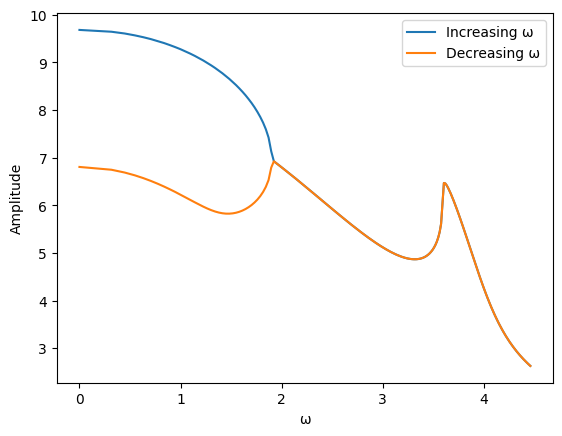

In [23]:
omega = np.sqrt(alpha_up)
plt.plot(np.sqrt(alpha_up), amplitudes_up, label="Increasing ω")
plt.plot(np.sqrt(alpha_down), amplitudes_down, label="Decreasing ω")
plt.xlabel("ω")
plt.ylabel("Amplitude")
plt.legend()
plt.show()